# Part 1: Evaluate Multi-class Taggers with Precision, Recall, and F1-score 

This part has 20 marks.

Study this notebook: run the code which trains different classifiers and evaluates average performances with precision, recall and f1score. The code also reports the scores for each individual label in each model.

Your task is to reimplement functions for accuracy_score, precision_score, recall_score, f1_score with options for multiple labels and mico- and macro-averaging for them. The answer should be a simplified form of the function in scikit-learn ([precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)). 

For details check out [Chapter 4 section 4.7](https://web.stanford.edu/~jurafsky/slp3/4.pdf) (Jurafsty and Martin; 2019).

Add code to produce a confusion matrix 

Explain the effect of the backoff 


## Import Libraries

In [1]:
# Brown corpus:
import nltk
from nltk.corpus import brown

# load a tagger models
from nltk.tag.perceptron import PerceptronTagger
# Naive Bayes MLE 
from nltk.tag.sequential import NgramTagger

# tagset mapping:
from nltk.tag.mapping import map_tag

# plotting:
from matplotlib import pyplot as plt

# If you downloaded these corous before comment below lines
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# you can compare you implementation with these
# evaluation metrics:
from sklearn.metrics import (
    f1_score as _f1_score, 
    precision_score as _precision_score, 
    recall_score as _recall_score,
    accuracy_score as _accuracy_score
)

import numpy as np

[nltk_data] Downloading package brown to /Users/ezz/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ezz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/ezz/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


## Prepare the training and testing dataset

In [2]:
# split training and testing data:
test_train_split = 500
test_set = brown.tagged_sents()[:test_train_split]
train_set = brown.tagged_sents()[test_train_split:]

## Load or train the classifiers

In [3]:
# load a pre-trained perceptron tagger:
perceptron_tagger = PerceptronTagger()

In [4]:
%%time
# train Naive Bayes / count-based ngram taggers:
unigram_tagger = NgramTagger(1, train=train_set)
bigram_tagger_nobackoff = NgramTagger(2, train=train_set)
bigram_tagger = NgramTagger(2, train=train_set, backoff=unigram_tagger)
trigram_tagger = NgramTagger(3, train=train_set, backoff=bigram_tagger)

CPU times: user 10.4 s, sys: 345 ms, total: 10.8 s
Wall time: 10.8 s


In [5]:
models = {
    "Perceptron": perceptron_tagger, 
    "Unigram": unigram_tagger, 
    "Bigram": bigram_tagger, 
    "Trigram": trigram_tagger, 
    "Bigram-backoff": bigram_tagger_nobackoff, 
}

## Evaluate the models

The test dataset and the models are based on the English Penn TreeBank tagsets. However, we don't need that fine degree of granularity. Therefore, we map each tag onto unviversal tagset.

In [6]:
# the ground truth labels according to the dataset:
tags_true = [
    map_tag("en-brown", "universal", tag)
    for tagged_sent in test_set
    for word, tag in tagged_sent
]

# strip the tags:
test_set_sents = [
    [word for word, tag in tagged_sent]
    for tagged_sent in test_set
]

tagset = sorted(list(set(tags_true)))
print(tagset)

['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


In [7]:
def accuracy_score(y_true, y_pred):
    """
    y_true : 1d array-like Ground truth (correct) target values.
    y_pred : 1d array-like Estimated targets as returned by a classifier.
    """
    #
    # your code here
    #
    return # the overall accuracy score with exact match
    
def precision_score(y_true, y_pred, labels=None, average=None):
    """
    y_true : 1d array-like Ground truth (correct) target values.
    y_pred : 1d array-like Estimated targets as returned by a classifier.
    labels : list of unique labels for sort out the result
    average : string, ['micro', 'macro'] instead of defining labels.
    
    When true positive + false positive == 0 returns 0
    """
    if labels is None:
        if average == 'micro':
            tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i]])
            fp = sum([1 for i in range(len(y_true)) if y_pred[i] and y_true[i] != y_pred[i]])
            if tp + fp == 0:
                return 0
            return tp / (tp + fp)
        elif average == 'macro':
            precisions = []
            for label in set(y_true):
                tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i] and y_true[i] == label])
                fp = sum([1 for i in range(len(y_true)) if y_pred[i] == label and y_true[i] != y_pred[i]])
                if tp + fp == 0:
                    precisions.append(0)
                else:
                    precisions.append(tp / (tp + fp))
            return sum(precisions) / len(precisions)
    else:
        precisions = []
        for label in labels:
            tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i] and y_true[i] == label])
            fp = sum([1 for i in range(len(y_true)) if y_pred[i] == label and y_true[i] != y_pred[i]])
            if tp + fp == 0:
                precisions.append(0)
            else:
                precisions.append(tp / (tp + fp))
        return precisions

def recall_score(y_true, y_pred, labels=None, average=None):
    """
    y_true : 1d array-like Ground truth (correct) target values.
    y_pred : 1d array-like Estimated targets as returned by a classifier.
    labels : list of unique labels for sort out the result
    average : string, ['micro', 'macro'] instead of defining labels.
    
    When true positive + false positive == 0 returns 0
    """
    if labels is None:
        if average == 'micro':
            tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i]])
            fn = sum([1 for i in range(len(y_true)) if y_true[i] and y_true[i] != y_pred[i]])
            if tp + fn == 0:
                return 0
            return tp / (tp + fn)
        elif average == 'macro':
            recalls = []
            for label in set(y_true):
                tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i] and y_true[i] == label])
                fn = sum([1 for i in range(len(y_true)) if y_true[i] == label and y_true[i] != y_pred[i]])
                if tp + fn == 0:
                    recalls.append(0)
                else:
                    recalls.append(tp / (tp + fn))
            return sum(recalls) / len(recalls)
    else:
        recalls = []
        for label in labels:
            tp = sum([1 for i in range(len(y_true)) if y_true[i] == y_pred[i] and y_true[i] == label])
            fn = sum([1 for i in range(len(y_true)) if y_true[i] == label and y_true[i] != y_pred[i]])
            if tp + fn == 0:
                recalls.append(0)
            else:
                recalls.append(tp / (tp + fn))
        return recalls

def f1_score(y_true, y_pred, labels=None, average=None):
    """
    y_true : 1d array-like Ground truth (correct) target values.
    y_pred : 1d array-like Estimated targets as returned by a classifier.
    labels : list of unique labels for sort out the result
    average : string, ['micro', 'macro'] instead of defining labels.
    """
    # you can call recall_score and precision_score.
    if labels is None:
        if average == 'micro':
            recall = recall_score(y_true, y_pred, average='micro')
            precision = precision_score(y_true, y_pred, average='micro')
            if recall + precision == 0:
                return 0
            return 2 * (recall * precision) / (recall + precision)
        elif average == 'macro':
            recall = recall_score(y_true, y_pred, average='macro')
            precision = precision_score(y_true, y_pred, average='macro')
            if recall + precision == 0:
                return 0
            return 2 * (recall * precision) / (recall + precision)
    else:
        f1_scores = []
        for label in labels:
            recall = recall_score(y_true, y_pred, labels=[label])
            precision = precision_score(y_true, y_pred, labels=[label])
            if recall + precision == 0:
                f1_scores.append(0)
            else:
                f1_scores.append(2 * (recall * precision) / (recall + precision))
        return f1_scores
    

def all_metrics(y_true, y_pred, labels=None, average=None):
    # you can compare you implementation with these
    return (
        _precision_score(y_true, y_pred, labels=labels, average=average),
        _recall_score(y_true, y_pred, labels=labels, average=average),
        _f1_score(y_true, y_pred, labels=labels, average=average),
        _accuracy_score(y_true, y_pred)
    )
    # remove the likes above and use the function calls below: 
    #return (
    #    precision_score(y_true, y_pred, labels=labels, average=average),
    #    recall_score(y_true, y_pred, labels=labels, average=average),
    #    f1_score(y_true, y_pred, labels=labels, average=average),
    #    accuracy_score(y_true, y_pred)
    #)


In [8]:
models_preds = dict()
print("              |       |         macro       |         micro")
print("  model name  |  acc  | preci  recal    f1  | preci  recal    f1")
print("-"*58)
for model_name, model in models.items():
    tags_pred = [
        map_tag("en-ptb", "universal", tag) if model_name == "Perceptron" else map_tag("en-brown", "universal", tag)
        for sent in test_set_sents
        for word, tag in model.tag(sent)
    ]
    models_preds[model_name] = tags_pred
    # print the results
    
    precision_macro, recall_macro, f1score_macro, accuracy = all_metrics(tags_true, tags_pred, average='macro')
    precision_micro, recall_micro, f1score_micro, _ = all_metrics(tags_true, tags_pred, average='micro')
    print(f"{model_name:14}| {100*accuracy:5.2f} | {100*precision_macro:5.2f}  {100*recall_macro:5.2f}  {100*f1score_macro:5.2f} | {100*precision_micro:5.2f}  {100*recall_micro:5.2f}  {100*f1score_micro:5.2f}")
    

              |       |         macro       |         micro
  model name  |  acc  | preci  recal    f1  | preci  recal    f1
----------------------------------------------------------
Perceptron    | 93.66 | 86.17  88.79  87.23 | 93.66  93.66  93.66
Unigram       | 93.30 | 86.11  94.57  86.09 | 93.30  93.30  93.30
Bigram        | 94.40 | 87.36  94.11  86.71 | 94.40  94.40  94.40
Trigram       | 94.54 | 87.53  94.48  86.97 | 94.54  94.54  94.54
Bigram-backoff| 24.63 | 87.72  31.96  36.74 | 24.63  24.63  24.63


In [9]:
for model_name, tags_pred in models_preds.items():
    print('='*50)
    print(model_name)
    print('')
    precisions, recalls, f1scores, _ = all_metrics(tags_true, tags_pred, labels=tagset)
    print("tag\tprecision\trecall\tf1-score")
    print("-"*50)
    for tag, precision, recall, f1score in zip(tagset, precisions, recalls, f1scores):
        print(f"{tag}\t{100*precision:9.2f}\t{100*recall:6.2f}\t{100*f1score:8.2f}")
    print('='*50)

Perceptron

tag	precision	recall	f1-score
--------------------------------------------------
.	   100.00	 99.76	   99.88
ADJ	    83.18	 80.25	   81.69
ADP	    98.26	 90.60	   94.28
ADV	    89.88	 89.88	   89.88
CONJ	    99.61	 99.61	   99.61
DET	    95.98	 92.34	   94.12
NOUN	    94.26	 97.28	   95.74
NUM	    89.18	 98.10	   93.42
PRON	    72.41	 97.15	   82.98
PRT	    63.31	 77.26	   69.59
VERB	    98.00	 93.24	   95.56
X	    50.00	 50.00	   50.00
Unigram

tag	precision	recall	f1-score
--------------------------------------------------
.	   100.00	100.00	  100.00
ADJ	    90.91	 86.79	   88.80
ADP	    97.30	 91.13	   94.11
ADV	    84.68	 87.20	   85.92
CONJ	    99.61	100.00	   99.80
DET	    99.78	 99.56	   99.67
NOUN	    96.41	 90.59	   93.41
NUM	    99.49	 92.86	   96.06
PRON	    99.64	 97.15	   98.38
PRT	    67.77	 96.39	   79.58
VERB	    96.45	 93.14	   94.76
X	     1.29	100.00	    2.54
Bigram

tag	precision	recall	f1-score
--------------------------------------------------
.	   100

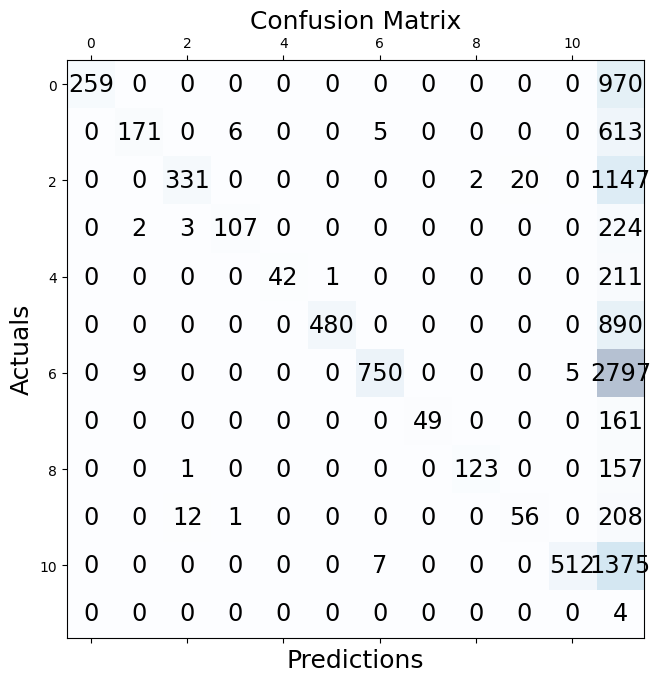

In [10]:
# Add confusion matrix here
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_true=tags_true, y_pred=tags_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Backoff

Compare the result of the bigram models (with and without backoff). In one or two sentences, explain why backoff is important for the n-gram models? Why tagging works better with backoff?

For more details check out the definition of backoff in [Chapter 3 section 3.4.3](https://web.stanford.edu/~jurafsky/slp3/3.pdf) (Jurafsty and Martin; 2019).

**ANSWER:** Backoff is important for the n-gram models because it allows the model to fall back on less specific 
information (i.e. unigrams) when it encounters unseen bigrams. This helps to reduce the sparsity of 
the data and improve the overall performance of the model.